In [ ]:
#importing libraries for model building
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
# Get a list of student files
student_file = [file for file in os.listdir() if file.endswith('.txt')]

# Read the content of each student's file
student_docs = [open(file,encoding='utf-8').read() for file in student_file]

# Print the list of student files and their content
for filename, document in zip(student_file, student_docs):
    print(f"File: {filename}")
    print("Content:")
    print(document)
    print("-" * 30)  # Separator between documents


File: john.txt
Content:
Content:
t is a long established fact that a reader will be distracted by the readable content of
a page when looking at its layout.
The point of using Lorem Ipsum
------------------------------
------------------------------
File: juma.txt
Content:
Content:
t is a long established fact that a reader will
be distracted by the readable content of a
page when looking at its layout. The point of using Lorem Ipsum
------------------------------
------------------------------
File: fatma.txt
Content:
Content:
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's
standard dummy text ever since the 1500s,
------------------------------
------------------------------


Here, in this code, it collects a list of the student text files, reads their content and prints both the file names and their respective content, making it useful for inspecting and working with the content of the files.

**TF-IDF Vectorization**

TF-IDF (Term Frequency-Inverse Document Frequency) is a metric that quantifies the value of a term in a document in relation to a group of documents and is used in natural language processing. It is frequently employed in text mining, information retrieval, and text analysis.

Term Frequency (TF) – It measures how frequently a term appears in a document.
Inverse Document Frequency(IDF) – It calculates the importance of a term in a collection of documents by considering how often it appears across the whole collection.
TF-IDF Score: It combines the TF and IDF to assess the importance of a term in a specific document.

Syntax : TF – IDF(t , d, D) = TF (t, d) * IDF( t, D)

Where,

t =term in the document

d = A document
D = collection of the documents

**Now let’s start with the implementation**

In [ ]:
# Function to create TF-IDF vectors from a list of documents
def create_tfidf_vectors(docs):
	return TfidfVectorizer().fit_transform(docs).toarray()


In this code, the function create_tfidf_vectors takes a list of text documents, uses sklearn’s ‘Tfidfvectorizer’ to calculate TF-IDF vectors for those documents, and return the TF-IDF vecotrs as a numpy array.

**Calculating Cosine Similarity**

Cosine Similarity is a metric that assesses how similar two non-zero vectors are to one another in an n-dimensional space. It is frequently used in text analysis to compare the vector representations of two documents to ascertain how similar they are.

**The formula for calculating cosine similarity between two vectors ‘A’ and ‘B’ is as follows:**

Cosine_similarity(A,B) = (A . B) / (||A|| * ||B||)

Where,

‘A’ and ‘B’ = vector representations of documents or data points

(A.B) = dot product of vectors A and B.

‘||A||’ and ‘||B||’ = magnitude of vectors A and B.


**Cosine similarity returns a value between -1 and 1 where:**

1 indicates perfect similarity (vectors in same direction).

-1 indicates prefect dissimilarity( Vectors in opposite direction).

0 indicates no similarity.

Now, let’s implement cosine similarity in the model.

In [ ]:
# Function to calculate cosine similarity between two document vectors
def calc_cosine_similarity(vector1, vector2):
	return cosine_similarity([vector1, vector2])


In the above code, it contains a function that calculates the cosine similarity between two document vectors. The cosine similarity score, that measures the degree of similarity between two texts represented by the two vectors, is returned when the function is called with the two vectors as input.

**Creating Document-vector Pairs**

Now, let’s create the document vector pairs

In [ ]:
# Create TF-IDF vectors for the student documents
doc_vec = create_tfidf_vectors(student_docs)
# Pair each document with its corresponding filename
doc_filename_pairs = list(zip(student_file, doc_vec))


Here, in the code, it prepare the student documents for further analysis by converting them into TF-IDF vectors(stored in ‘doc_vec’) and then pairing each document with its filename( stored in ‘doc_filename_pairs’). These paired representations can be useful for tasks like document retrieval, plagiarism detection , or any other analysis that requires associating documents with their content and metadata.

**Checking Plagiarism**

Now, after performing all the tasks , we start with implementing the plagiarism checking function that will help us calculate the plagiarism.

In [ ]:
# Function to check for plagiarism
def find_plagiarism():
	# Initialize an empty set to store plagiarism results
	plagiarism_results = set()

	# Access the global variable doc_filename_pairs
	global doc_filename_pairs

	# Iterate through each student's file and vector
	for student_a_file, student_a_vec in doc_filename_pairs:
		# Create a copy of the document-filename pairs for iteration
		remaining_pairs = doc_filename_pairs.copy()

		# Find the index of the current document-filename pair
		current_index = remaining_pairs.index((student_a_file, student_a_vec))

		# Remove the current pair from the remaining pairs
		del remaining_pairs[current_index]

		# Iterate through the remaining pairs to compare with other students
		for student_b_file, student_b_vec in remaining_pairs:
			# Calculate the cosine similarity between student_a_vec and student_b_vec
			similarity_score = calc_cosine_similarity(
				student_a_vec, student_b_vec)[0][1]

			# Sort the filenames to maintain consistency in results
			sorted_filenames = sorted((student_a_file, student_b_file))

			# Create a plagiarism result tuple with sorted filenames and similarity score
			plagiarism_result = (
				sorted_filenames[0], sorted_filenames[1], similarity_score)

			# Add the result to the plagiarism_results set
			plagiarism_results.add(plagiarism_result)

	# Return the set of plagiarism results
	return plagiarism_results


# Print plagiarism results
plagiarism_results = find_plagiarism()
for result in plagiarism_results:
	print(result)


('fatma.txt', 'juma.txt', 0.24575940597463056)
('fatma.txt', 'john.txt', 0.24575940597463056)
('john.txt', 'juma.txt', 0.9999999999999999)


In the above code, it defines a function ‘find_plagiarism’ to check the plagiarism among the collection of the student documents. It iterates through pairs of student documents, calculating cosine similarity between each pair. It ensures that each document is compared to others only once. The results are stored in a set, ‘plagiarism_results’ , as tuples containing the filenames of similar documents and their cosine similarity scores. Finally, it prints the plagiarism results, identifying the potentially plagiarized documents

**Word Cloud Visualization**

Now , let’s represent each document with a wordcloud.

**Wordcloud for John.txt**

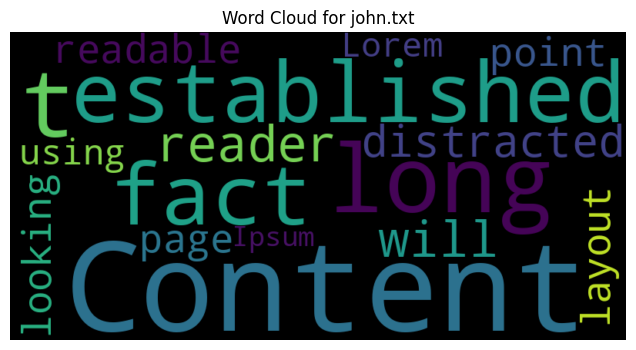

In [ ]:
# Function to generate a word cloud for a document
def generate_word_cloud(document_text, filename):
	# Create a word cloud from the document text
	wordcloud = WordCloud(width=800, height=400).generate(document_text)

	# Create a figure to display the word cloud
	plt.figure(figsize=(8, 4))

	# Display the word cloud as an image with bilinear interpolation
	plt.imshow(wordcloud, interpolation='bilinear')

	# Set the title of the word cloud figure to include the filename
	plt.title(f'Word Cloud for {filename}')

	# Turn off axis labels and ticks
	plt.axis('off')

	# Show the word cloud visualization
	plt.show()


# Find plagiarism among student documents and store the results
plagiarism_results = find_plagiarism()

# Iterate through plagiarism results
for result in plagiarism_results:
	# Check if the similarity score is greater than or equal to 0.5 (adjust as needed)
	if result[2] >= 0.5:
		# Generate and display a word cloud for the document with similarity above the threshold
		generate_word_cloud(open(result[0]).read(), result[0])


Here, in the code, it combines the plagiarism detection with word cloud generation , visually representing documents with high similarity scores through the word cloud visualizations. Here, we are representing the word cloud for john.txt document.

**Wordcloud for fatma.txt**

Let’s build another word cloud for second document used to build the model.

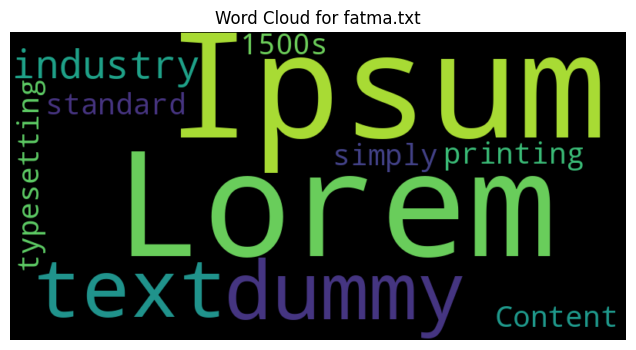

In [ ]:
# Specify the target document filename
target_document = "fatma.txt"

# Iterate through pairs of filenames and document vectors
for filename, document_vector in doc_filename_pairs:
	# Check if the current filename matches the target_document
	if filename == target_document:
		# Generate a word cloud for the target document
		generate_word_cloud(open(filename).read(), filename)


This code iterates through a list of document pairs, checking if a specific document(‘target_document’) is found, and if so, generates the word cloud for that document. T

**Wordcloud for Juma.txt**

Let’s build another word cloud for third document used to build the model.

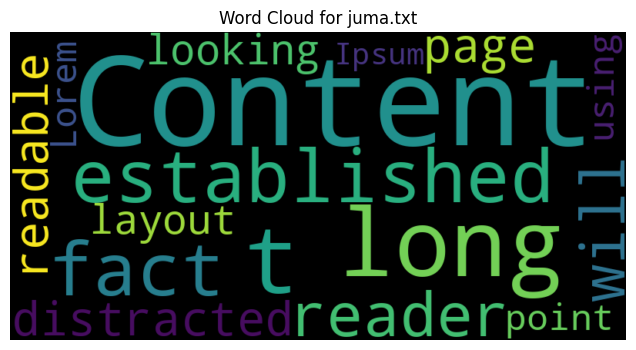

In [ ]:
# Specify the target document filename
target_document = "juma.txt"

# Iterate through pairs of filenames and document vectors
for filename, document_vector in doc_filename_pairs:
	# Check if the current filename matches the target_document
	if filename == target_document:
		# Generate a word cloud for the target document
		generate_word_cloud(open(filename).read(), filename)


This code searches for a specific document (‘juma.txt’ ) in the list of the document pairs(‘doc_filename_pairs’). If it finds a match, it generates a word cloud for that document, visually representing its content using the ‘generate_word_cloud’ function.

**Conclusion**

In conclusion, Plagiarism detection using python is a potent use of similarity analysis and natural language processing methods. We can systematically examine and find possible instances of plagiarism across a group of papers by utilizing technologies like TF-IDF vectorization and cosine similarity. The procedure entails building vector representations of text documents, determining the similarity scores of those documents, and identifying pairings of papers with a high degree of similarity as possible instances of plagiarism.

Additionally, word cloud visualizations further improves the analysis by giving a visual representation of the textual content of documents and making it easier to see the similarities and discrepancies. The integrated strategy aids in the human interpretation of finding in addition to automating search for probable plagiarism. However, automated systems may produce false positives or necessitate the human judgement to assess the severity of plagiarism, its crucial to define acceptable thresholds and analyze the results with the context.